In [1]:
import pickle
import os
import numpy as np
import boundary_functions as bf
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

In [7]:
def bin_simulator_output(out = [0, 0],
                         bin_dt = 0.04,
                         nbins = 0): # ['v', 'a', 'w', 'ndt', 'angle']
        
        # Generate bins
        if nbins == 0:
            nbins = int(out[2]['max_t'] / bin_dt)
            bins = np.zeros(nbins + 1)
            bins[:nbins] = np.linspace(0, out[2]['max_t'], nbins)
            bins[nbins] = np.inf
        else:  
            bins = np.zeros(nbins + 1)
            bins[:nbins] = np.linspace(0, out[2]['max_t'], nbins)
            bins[nbins] = np.inf

        cnt = 0
        counts = np.zeros( (nbins, len(out[2]['possible_choices']) ) )

        for choice in out[2]['possible_choices']:
            counts[:, cnt] = np.histogram(out[0][out[1] == choice], bins = bins)[0] / out[2]['n_samples']
            cnt += 1
        return counts

In [62]:
# data = pickle.load(open('/Users/afengler/OneDrive/project_nn_likelihoods/data/kde/ddm_elife/parameter_recovery_data_binned_0_nbins_0_n_4096/elife_ddm_nchoices_2_parameter_recovery_binned_0_nbins_0_nreps_1_n_4096.pickle', 'rb'))
# data[2]['possible_choices'] = [-1, 1]
n_str = '4096'
model_str = 'ddm'

In [63]:
data = pickle.load(open('/Users/afengler/OneDrive/project_nn_likelihoods/data/kde/' + model_str + \
                        '_elife/parameter_recovery_data_binned_0_nbins_0_n_' + n_str + \
                        '/elife_' + model_str + \
                        '_nchoices_2_parameter_recovery_binned_0_nbins_0_nreps_1_n_' + n_str + '.pickle', 'rb'))
data[2]['possible_choices'] = [-1, 1]

# change max_t to 10s because that's what CNN was trained
data[2]['max_t'] = 10.0



In [64]:
data_binned_256 = []
data_binned_256.append(data[0])
data_binned_512 = []
data_binned_512.append(data[0])

binned_tmp_256 = np.zeros((1, 1000, 256, 2))
binned_tmp_512 = np.zeros((1, 1000, 512, 2))


for i in range(1000):
    out = []
    out.append(data[1][0, i, :, 0])
    out.append(data[1][0, i, :, 1])
    out.append(data[2])
    
    x_256 = bin_simulator_output(out = out,
                                 nbins = 256)
    x_512 = bin_simulator_output(out = out,
                                 nbins = 512)
    
    binned_tmp_256[0, i, :, :] = x_256
    binned_tmp_512[0, i, :, :] = x_512
    
    if i % 100 == 0:
        print(i)

data_binned_256.append(binned_tmp_256)
data_binned_512.append(binned_tmp_512)
    
data_binned_256.append(data[2])
data_binned_512.append(data[2])

0
100
200
300
400
500
600
700
800
900


In [35]:
pickle.dump(data_binned_256, open('/Users/afengler/OneDrive/project_nn_likelihoods/data/kde/' + model_str + '_elife/parameter_recovery_data_binned_1_nbins_256_n_' + n_str + \
                                  '/elife_' + model_str + '_nchoices_2_parameter_recovery_binned_1_nbins_256_nreps_1_n_' + n_str + '.pickle', 'wb'), 
            protocol = 2)

In [36]:
pickle.dump(data_binned_512, open('/Users/afengler/OneDrive/project_nn_likelihoods/data/kde/' + model_str + '_elife/parameter_recovery_data_binned_1_nbins_512_n_' + n_str + \
                                  '/elife_' + model_str + '_nchoices_2_parameter_recovery_binned_1_nbins_512_nreps_1_n_' + n_str + '.pickle', 'wb'), 
            protocol = 2)

In [4]:
# SOME TESTS
import cddm_data_simulation as cds


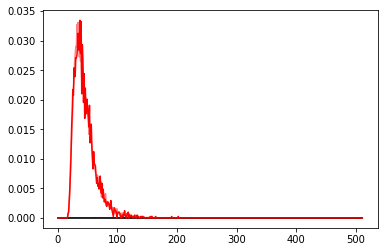

In [57]:
i = 100
    
out = cds.ddm_flexbound(v = data_binned_512[0][i, 0], 
                        a = data_binned_512[0][i, 1],
                        w = data_binned_512[0][i, 2],
                        ndt = data_binned_512[0][i, 3], 
                        delta_t = 0.001, 
                        s = 1,  #np.sqrt(2),
                        max_t = 10,
                        boundary_fun = bf.constant,
                        n_samples = 20000)

binned = bin_simulator_output(out = out,
                              nbins = 512)


    
plt.plot(binned[:, 0], color = 'black', alpha = 0.5)
plt.plot(binned[:, 1], color = 'red', alpha = 0.5)
plt.plot(data_binned_512[1][0][i][:, 0], color = 'black')
plt.plot(data_binned_512[1][0][i][:, 1], color = 'red')

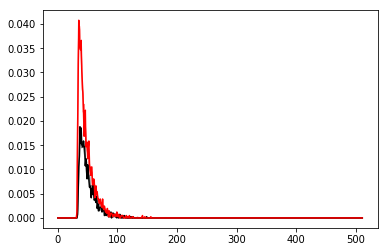

In [45]:
plt.plot(binned[:, 0], color = 'black', alpha = 0.5)
plt.plot(binned[:, 1], color = 'red', alpha = 0.5)
plt.plot(data_binned_512[1][0][0][:, 0], color = 'black')
plt.plot(data_binned_512[1][0][0][:, 1], color = 'red')

In [32]:
data_binned_512[1][0]

(1000, 512, 2)

In [65]:
data[0]

array([[ 0.29013616,  0.5732122 ,  0.56510556,  0.6202364 ],
       [ 2.3652787 ,  0.7475329 ,  0.6085406 ,  0.45740852],
       [-1.9124724 ,  1.0613471 ,  0.5251666 ,  0.22333424],
       ...,
       [ 1.2240385 ,  1.0580128 ,  0.4856123 ,  1.7803314 ],
       [-2.2178957 ,  1.6264052 ,  0.27447334,  1.5300837 ],
       [-0.02114056,  0.7334838 ,  0.39837652,  0.87968767]],
      dtype=float32)

In [54]:
n_str = '1024'
model_str = 'ddm'

data_ = pickle.load(open('/Users/afengler/OneDrive/project_nn_likelihoods/data/kde/' + model_str + \
                        '_elife/parameter_recovery_data_binned_1_nbins_512_n_' + n_str + \
                        '/elife_' + model_str + \
                        '_nchoices_2_parameter_recovery_binned_1_nbins_512_nreps_1_n_' + n_str + '.pickle', 'rb'))

In [55]:
data_

[array([[ 1.3078684 ,  1.5692139 ,  0.40353978,  0.7989374 ],
        [ 0.15081045,  2.1154125 ,  0.5016084 ,  1.4090556 ],
        [-2.0069778 ,  1.6092589 ,  0.712587  ,  1.4454311 ],
        ...,
        [ 2.4429796 ,  1.2634765 ,  0.7085911 ,  1.6392365 ],
        [ 2.1372757 ,  1.6593502 ,  0.32406518,  1.9461266 ],
        [ 0.7318187 ,  1.8007475 ,  0.7009304 ,  1.5478374 ]],
       dtype=float32),
 array([[[[0.        , 0.        ],
          [0.        , 0.        ],
          [0.        , 0.        ],
          ...,
          [0.        , 0.        ],
          [0.        , 0.        ],
          [0.        , 0.        ]],
 
         [[0.        , 0.        ],
          [0.        , 0.        ],
          [0.        , 0.        ],
          ...,
          [0.        , 0.00097656],
          [0.        , 0.00097656],
          [0.03710938, 0.0703125 ]],
 
         [[0.        , 0.        ],
          [0.        , 0.        ],
          [0.        , 0.        ],
          ...,


In [2]:
import cddm_data_simulation as cds

In [4]:
out = cds.test()

In [23]:
out_arr = np.concatenate([out[0], out[1]], axis = 1)

In [25]:
out_arr.shape

(20000, 2)

In [32]:
type(out) == tuple


True

In [30]:
type(out_arr) == np.ndarray

True

In [33]:
out[0].shape

(20000, 1)

In [38]:
np.expand_dims(out_arr[:, 0], axis = 1).shape

(20000, 1)

In [39]:
import pickle

In [40]:
pickle.load(open('/Users/afengler/OneDrive/project_nn_likelihoods/data/tests/models/test/parameter_recovery_data_binned_0_nbins_0_n_1000/test_nchoices_2_parameter_recovery_binned_0_nbins_0_nreps_1_n_1000.pickle', 'rb'))

(array([[ 0.74327415,  0.645841  ,  0.6400955 ,  0.46597812],
        [-0.33610138,  1.1981581 ,  0.5164657 ,  0.7851524 ],
        [-1.2525686 ,  1.1945591 ,  0.31144702,  0.7034199 ],
        [ 1.4751217 ,  0.97497964,  0.6629451 ,  0.2682129 ],
        [ 0.7982579 ,  0.794083  ,  0.55831426,  0.6507257 ],
        [-0.98591936,  1.0263612 ,  0.679222  ,  0.2326981 ],
        [ 0.35309684,  1.0299312 ,  0.46966428,  0.6159006 ],
        [ 0.8568966 ,  1.2028342 ,  0.48996052,  0.7993983 ],
        [-0.39936328,  1.2334279 ,  0.41773105,  0.79922897],
        [ 0.4332882 ,  1.1419479 ,  0.49621826,  0.6636164 ],
        [ 0.11822534,  0.74837047,  0.4982322 ,  0.42108163],
        [ 1.0013398 ,  0.9467556 ,  0.53612936,  0.40108737],
        [-0.5581848 ,  1.239694  ,  0.34700498,  0.8415847 ],
        [ 0.76857096,  0.8098346 ,  0.31781563,  0.5355541 ],
        [ 0.6289541 ,  1.2678409 ,  0.45325345,  0.39593735],
        [ 0.15958482,  1.3289692 ,  0.5839242 ,  0.8139067 ],
        

In [41]:
binned256 = pickle.load(open('/Users/afengler/OneDrive/project_nn_likelihoods/data/tests/models/test/parameter_recovery_data_binned_1_nbins_256_n_1000/test_nchoices_2_parameter_recovery_binned_1_nbins_256_nreps_1_n_1000.pickle', 'rb'))

In [46]:
binned256[1][0,0,:100, :]

array([[0.   , 0.   ],
       [0.   , 0.   ],
       [0.   , 0.   ],
       [0.   , 0.   ],
       [0.   , 0.   ],
       [0.   , 0.   ],
       [0.001, 0.126],
       [0.019, 0.168],
       [0.021, 0.13 ],
       [0.021, 0.095],
       [0.02 , 0.089],
       [0.016, 0.055],
       [0.013, 0.022],
       [0.012, 0.026],
       [0.008, 0.027],
       [0.002, 0.022],
       [0.01 , 0.017],
       [0.004, 0.013],
       [0.004, 0.015],
       [0.003, 0.015],
       [0.002, 0.005],
       [0.001, 0.001],
       [0.   , 0.004],
       [0.002, 0.001],
       [0.002, 0.001],
       [0.001, 0.001],
       [0.   , 0.   ],
       [0.   , 0.   ],
       [0.   , 0.003],
       [0.   , 0.   ],
       [0.   , 0.   ],
       [0.   , 0.   ],
       [0.   , 0.   ],
       [0.001, 0.   ],
       [0.   , 0.   ],
       [0.   , 0.   ],
       [0.   , 0.   ],
       [0.   , 0.001],
       [0.   , 0.   ],
       [0.   , 0.   ],
       [0.   , 0.   ],
       [0.   , 0.   ],
       [0.   , 0.   ],
       [0. 

In [47]:
binned512 = pickle.load(open('/Users/afengler/OneDrive/project_nn_likelihoods/data/tests/models/test/parameter_recovery_data_binned_1_nbins_512_n_1000/test_nchoices_2_parameter_recovery_binned_1_nbins_512_nreps_1_n_1000.pickle', 'rb'))

In [48]:
binned512[1][0,0,:100, :]

array([[0.   , 0.   ],
       [0.   , 0.   ],
       [0.   , 0.   ],
       [0.   , 0.   ],
       [0.   , 0.   ],
       [0.   , 0.   ],
       [0.   , 0.   ],
       [0.   , 0.   ],
       [0.   , 0.   ],
       [0.   , 0.   ],
       [0.   , 0.   ],
       [0.   , 0.   ],
       [0.   , 0.031],
       [0.   , 0.092],
       [0.01 , 0.086],
       [0.01 , 0.084],
       [0.013, 0.076],
       [0.008, 0.055],
       [0.009, 0.051],
       [0.012, 0.041],
       [0.008, 0.05 ],
       [0.012, 0.042],
       [0.01 , 0.029],
       [0.005, 0.022],
       [0.009, 0.013],
       [0.004, 0.013],
       [0.007, 0.016],
       [0.006, 0.009],
       [0.002, 0.015],
       [0.006, 0.013],
       [0.   , 0.01 ],
       [0.002, 0.012],
       [0.005, 0.008],
       [0.005, 0.009],
       [0.002, 0.007],
       [0.002, 0.006],
       [0.003, 0.006],
       [0.001, 0.009],
       [0.   , 0.007],
       [0.003, 0.007],
       [0.001, 0.005],
       [0.001, 0.001],
       [0.001, 0.001],
       [0. 